<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Predicting-Diabetes/blob/main/Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing Tools

# 1.Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#machine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

# 2.importing Dataset.

In [ ]:
dataset = pd.read_csv("diabetes.csv")
df = pd.DataFrame(dataset)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()
nan_counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


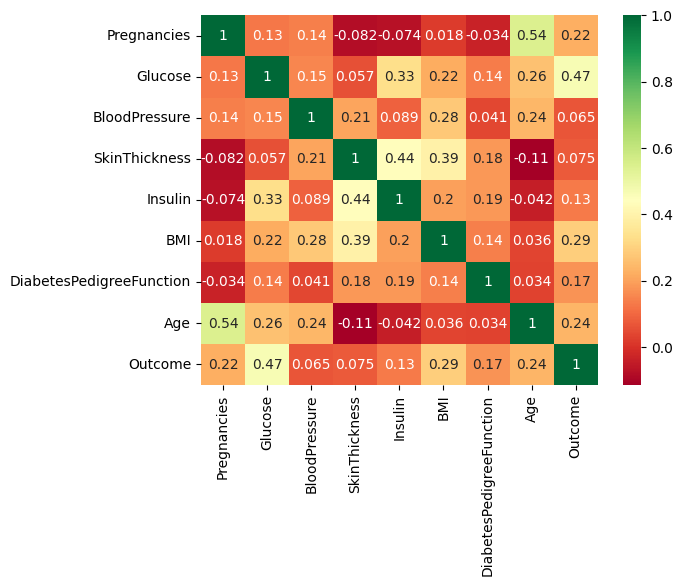

In [ ]:
#Find out Correlated Cols
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

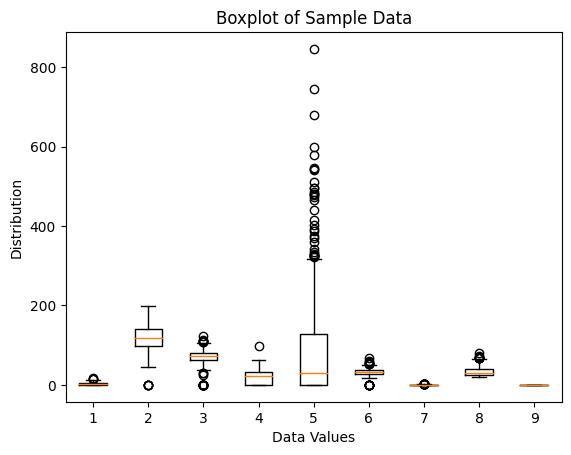

In [ ]:
# to see if data needs Feature scalling
data = np.random.normal(loc=5, scale=2, size=100)
plt.boxplot(df)
plt.xlabel('Data Values')
plt.ylabel('Distribution')
plt.title('Boxplot of Sample Data')
plt.show()

In [ ]:
#Counting no of zeros in each Col
for i in range(8):
  count_zeros = df[df.columns[i]].eq(0).sum()
  print(df.columns[i],count_zeros)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Glucose, BloodPressure, SkinThickness, Insulin, BMI   has 0 values which is not possible

#Replacing Zeros

In [ ]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())


In [ ]:
# Removing last Col (dependnet value)
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
print (x) # x contains the features or the independent variables
print("--------------------------")
print(y) # y contains the dependent variables or the predicted that we want the model to be able to predict

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
--------------------------
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 

In [ ]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


# Splitting the Dataset into Training set & Test set

In [ ]:
# creating instance
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 7)

print(x_train)
print("-----------------------")
print(y_train)
print("-----------------------")
print(x_test)
print("-----------------------")
print(y_test)

[[5.00e+00 1.08e+02 7.20e+01 ... 3.61e+01 2.63e-01 3.30e+01]
 [2.00e+00 1.02e+02 8.60e+01 ... 4.55e+01 1.27e-01 2.30e+01]
 [4.00e+00 1.58e+02 7.80e+01 ... 3.29e+01 8.03e-01 3.10e+01]
 ...
 [0.00e+00 5.70e+01 6.00e+01 ... 2.17e+01 7.35e-01 6.70e+01]
 [1.00e+00 1.05e+02 5.80e+01 ... 2.43e+01 1.87e-01 2.10e+01]
 [8.00e+00 1.79e+02 7.20e+01 ... 3.27e+01 7.19e-01 3.60e+01]]
-----------------------
[0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 1

# Feature Scaling

In [ ]:
#to avoid some features being domenated by other features
sc = StandardScaler()

# fit and transform our data using standradistion
x_train[:,:] = sc.fit_transform(x_train[:,:])

x_test[:,:] = sc.transform(x_test[:,:])

print(x_train)
print("--------------------")
print(x_test)

[[ 0.35483802 -0.42574263  0.01020087 ...  0.50439072 -0.61786951
   0.01064085]
 [-0.54794048 -0.62304324  1.1769862  ...  1.85407844 -1.0345765
  -0.86049025]
 [ 0.05391185  1.21842916  0.51025173 ...  0.04492255  1.03670235
  -0.16358537]
 ...
 [-1.1497928  -2.10279784 -0.98990085 ... -1.56321601  0.82834886
   2.97248659]
 [-0.84886664 -0.52439293 -1.15658447 ... -1.18989813 -0.85073518
  -1.03471647]
 [ 1.25761651  1.9089813   0.01020087 ...  0.01620579  0.77932451
   0.27198018]]
--------------------
[[-0.84886664 -1.01764447 -0.82321723 ... -0.77350511  0.35342545
  -0.77337714]
 [ 0.95669035  1.97474818  1.01030258 ...  0.47567396  0.37180958
   1.57867683]
 [ 2.76224733  1.02112854  1.51035344 ... -0.83093863  0.81609277
   0.88177195]
 ...
 [-1.1497928   0.23192609 -0.32316637 ... -0.29967857  2.83834727
  -0.68626403]
 [-0.54794048 -0.68881011 -0.48984999 ...  0.04492255  1.23279976
  -0.4249247 ]
 [-0.54794048 -0.98476103 -0.82321723 ... -0.75914673  0.18490424
  -0.9476033

#SVM(Kernel'rbf')

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf" , random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[91  6]
 [20 37]]
0.8311688311688312


Accuracy for SVM 83%

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


c = RandomForestClassifier(n_estimators=10 , criterion="entropy", random_state=0)
c.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_p_3 = c.predict(x_train)

cmm = confusion_matrix(y_train,y_p_3)
print(cmm)
print(accuracy_score(y_train,y_p_3))

[[403   0]
 [  9 202]]
0.9853420195439739


In [ ]:
y_pred_3 = c.predict(x_test)

cm_3 = confusion_matrix(y_test,y_pred_3)
print(cm_3)
print(accuracy_score(y_test,y_pred_3))

[[87 10]
 [25 32]]
0.7727272727272727


Accuracy for Random Forest 77%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy" , random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[76 21]
 [27 30]]


0.6883116883116883

Accuracy for Decision tree 68%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 , metric="minkowski" , p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[81 16]
 [23 34]]


0.7467532467532467

Accuracy of knn 74.6%